In [1]:
import sys
sys.path.append('../')
import src.dem as dem

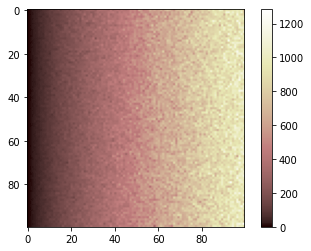

In [25]:
filename = r"C:\Users\pgred\Documents\Personal\Git\flow-path\data\29229620-DEFRA-Basingstoke_DTM_2m\SU65se_DTM_2m.tif"
test_dem = dem.DemDummy(relief=1000)
test_dem.plot()

In [26]:
import src.cell as cell
import src.controls as controls
test_controls = controls.Controls(dem=test_dem,slope_threshold=45,divergent_flow=2, persistence=1, horizontal_flow=True, fahrboschung_angle=2, max_n_steps=100, max_length=2000)
test_cell = cell.Cell(controls=test_controls,coords=(50,50))

In [30]:
import src.path as path
test_path = path.Path(controls=test_controls, start_cell=test_cell)
test_path.results.affected_cells

[(50, 50)]

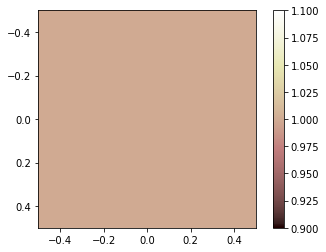

In [31]:
test_path.results.plot()